# 🔎 Análisis Exploratorio de Datos:

In [204]:
from textblob import TextBlob
import datetime
import inspect
import re
import matplotlib.pyplot as plt
import inspect
import pandas as pd
import gzip
import os
import seaborn as sns
import numpy as np

In [205]:
# Cargar los datos Yelp
business_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/business.parquet')
users_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/user_reducido.parquet')
reviews_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/review_FL_reducido.parquet')
checkin_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/checkin_reducido.parquet')
tip_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/tip.parquet')


In [206]:
#cargar los datos google y metadata 
metadata_df = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_metadata_FL.parquet')
review_google_df = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_review_FL_reducido.parquet')

#### Validacion de los datos, nulos y duplicados


In [207]:
# Función para analizar tipos de datos y valores faltantes
def analizar_datos(df, nombre_df):
    print(f"--- {nombre_df} ---")
    print(df.info())
    print("\n")


In [208]:
analizar_datos(metadata_df, 'metadata_df')

--- metadata_df ---
<class 'pandas.core.frame.DataFrame'>
Index: 220001 entries, 1302883 to 1253187
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              219996 non-null  object 
 1   address           213726 non-null  object 
 2   gmap_id           220001 non-null  object 
 3   description       15746 non-null   object 
 4   latitude          220001 non-null  float64
 5   longitude         220001 non-null  float64
 6   category          218573 non-null  object 
 7   avg_rating        220001 non-null  float64
 8   num_of_reviews    220001 non-null  int64  
 9   price             16906 non-null   object 
 10  hours             160199 non-null  object 
 11  MISC              166273 non-null  object 
 12  state             163349 non-null  object 
 13  relative_results  196872 non-null  object 
 14  url               220001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usa

In [209]:
metadata_df = metadata_df.drop(columns=['description', 'price', 'MISC', 'hours', 'category', 'state', 'relative_results'])


In [210]:
metadata_df = metadata_df.dropna()

In [211]:
analizar_datos(metadata_df, 'metadata_df')

--- metadata_df ---
<class 'pandas.core.frame.DataFrame'>
Index: 213726 entries, 1302883 to 1253187
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            213726 non-null  object 
 1   address         213726 non-null  object 
 2   gmap_id         213726 non-null  object 
 3   latitude        213726 non-null  float64
 4   longitude       213726 non-null  float64
 5   avg_rating      213726 non-null  float64
 6   num_of_reviews  213726 non-null  int64  
 7   url             213726 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 14.7+ MB
None




In [212]:
analizar_datos(review_google_df, 'review_google_df')

--- review_google_df ---
<class 'pandas.core.frame.DataFrame'>
Index: 712500 entries, 762395 to 1252925
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  712500 non-null  float64
 1   name     712500 non-null  object 
 2   time     712500 non-null  int64  
 3   rating   712500 non-null  int64  
 4   text     442419 non-null  object 
 5   pics     26083 non-null   object 
 6   resp     114178 non-null  object 
 7   gmap_id  712500 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 48.9+ MB
None




In [213]:
review_google_df = review_google_df.drop(columns=["pics", "resp", 'text'], axis = 1)

In [214]:
review_google_df.isnull().sum()

user_id    0
name       0
time       0
rating     0
gmap_id    0
dtype: int64

In [191]:
analizar_datos(business_df, 'business_df')

--- business_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668575 entries, 0 to 668574
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   668575 non-null  object 
 1   name          668575 non-null  object 
 2   address       668575 non-null  object 
 3   city          668575 non-null  object 
 4   state         668575 non-null  object 
 5   postal_code   668575 non-null  object 
 6   latitude      668575 non-null  float64
 7   longitude     668575 non-null  float64
 8   stars         668575 non-null  float64
 9   review_count  668575 non-null  int64  
 10  is_open       668575 non-null  int64  
 11  attributes    668575 non-null  object 
 12  categories    668575 non-null  object 
 13  hours         668575 non-null  object 
 14  parsed_hours  668575 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 76.5+ MB
None




In [192]:
analizar_datos(reviews_df, 'review_df')

--- review_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209708 entries, 0 to 209707
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    209708 non-null  object        
 1   user_id      209708 non-null  object        
 2   business_id  209708 non-null  object        
 3   stars        209708 non-null  int64         
 4   useful       209708 non-null  int64         
 5   funny        209708 non-null  int64         
 6   cool         209708 non-null  int64         
 7   text         209708 non-null  object        
 8   date         209708 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(4), object(4)
memory usage: 14.4+ MB
None




In [193]:
analizar_datos(users_df, 'user_df')

--- user_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63168 entries, 0 to 63167
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             63168 non-null  object 
 1   name                63168 non-null  object 
 2   review_count        63168 non-null  int64  
 3   yelping_since       63168 non-null  object 
 4   useful              63168 non-null  int64  
 5   funny               63168 non-null  int64  
 6   cool                63168 non-null  int64  
 7   elite               63168 non-null  object 
 8   friends             63168 non-null  object 
 9   fans                63168 non-null  int64  
 10  average_stars       63168 non-null  float64
 11  compliment_hot      63168 non-null  int64  
 12  compliment_more     63168 non-null  int64  
 13  compliment_profile  63168 non-null  int64  
 14  compliment_cute     63168 non-null  int64  
 15  compliment_list     63168 non-null  i

In [194]:
analizar_datos(checkin_df, 'checkin_df')

--- checkin_df ---
<class 'pandas.core.frame.DataFrame'>
Index: 92351 entries, 40660 to 66243
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  92351 non-null  object
 1   date         92351 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None




In [195]:
analizar_datos(tip_df, 'tip_df')

--- tip_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[us]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[us](1), int64(1), object(3)
memory usage: 34.7+ MB
None




In [221]:
# Función para verificar valores duplicados y eliminarlos
def eliminar_duplicados(df, nombre_df):
    columnas_excluir = [col for col in df.columns if isinstance(df[col].iloc[0], (list, dict))]
    df_sin_columnas_no_hashables = df.drop(columns=columnas_excluir)
    
    duplicados = df_sin_columnas_no_hashables.duplicated().sum()
    print(f"{nombre_df} tiene {duplicados} filas duplicadas.")
    
    df_sin_duplicados = df.drop_duplicates(subset=df_sin_columnas_no_hashables.columns)
    print(f"{nombre_df} después de eliminar duplicados tiene {df_sin_duplicados.shape[0]} filas.")
    print("\n")
    
    return df_sin_duplicados

#implementacion de la funcion creada anteriormente
business_df = eliminar_duplicados(business_df, 'business_df')
review_df = eliminar_duplicados(reviews_df, 'review_df')
user_df = eliminar_duplicados(users_df, 'user_df')
checkin_df = eliminar_duplicados(checkin_df, 'checkin_df')
tip_df = eliminar_duplicados(tip_df, 'tip_df')
metadata_df = eliminar_duplicados(metadata_df, 'metadata_df')


business_df tiene 43 filas duplicadas.
business_df después de eliminar duplicados tiene 668532 filas.


review_df tiene 0 filas duplicadas.
review_df después de eliminar duplicados tiene 209708 filas.


user_df tiene 230 filas duplicadas.
user_df después de eliminar duplicados tiene 62938 filas.


checkin_df tiene 0 filas duplicadas.
checkin_df después de eliminar duplicados tiene 92351 filas.


tip_df tiene 67 filas duplicadas.
tip_df después de eliminar duplicados tiene 908848 filas.


metadata_df tiene 233 filas duplicadas.
metadata_df después de eliminar duplicados tiene 213493 filas.




#### Deteccion y muestra de Distribucion de datos y outliers

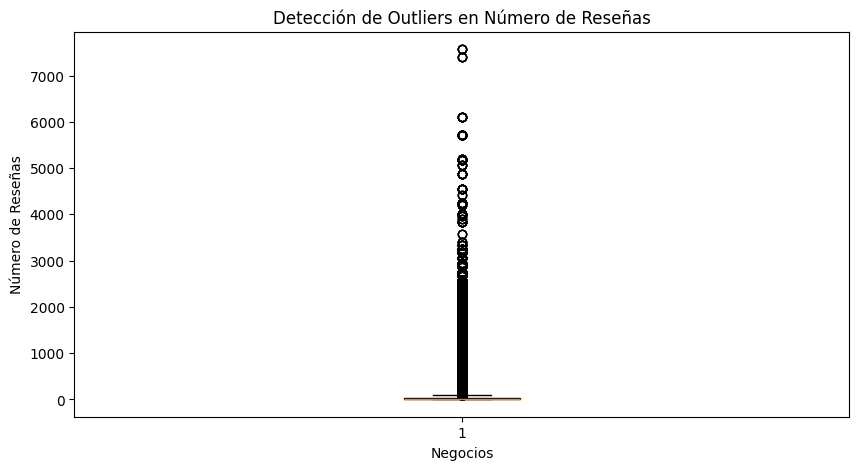

In [228]:
plt.figure(figsize=(10, 5))
plt.boxplot(business_df['review_count'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Negocios')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas')
plt.show()


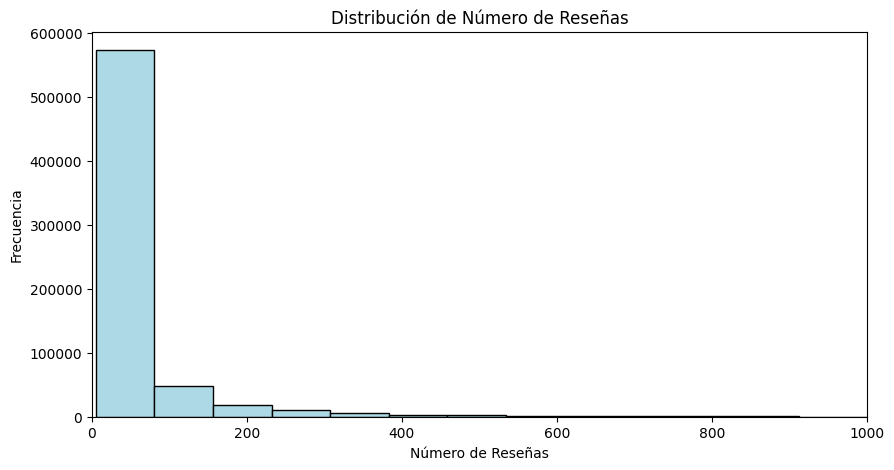

In [234]:
plt.figure(figsize=(10, 5))
plt.hist(business_df['review_count'].dropna(), bins=100, edgecolor='black', color='lightblue')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Número de Reseñas')
plt.xlim(0, 1000)
plt.show()


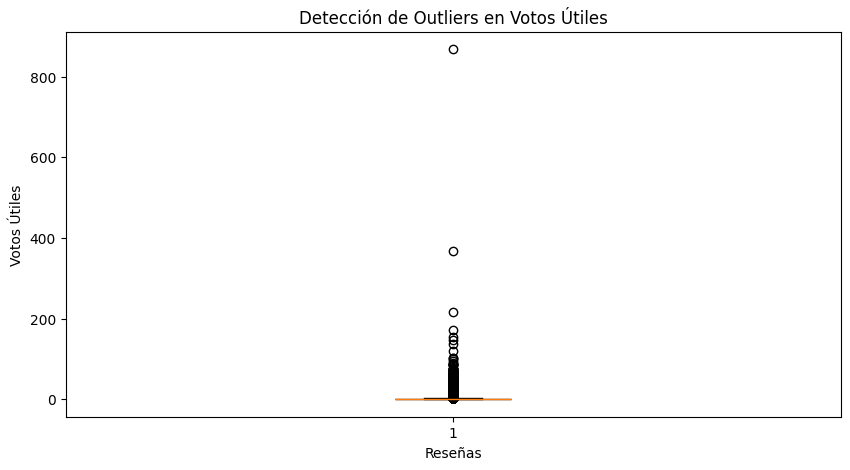

In [229]:
plt.figure(figsize=(10, 5))
plt.boxplot(reviews_df['useful'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Reseñas')
plt.ylabel('Votos Útiles')
plt.title('Detección de Outliers en Votos Útiles')
plt.show()


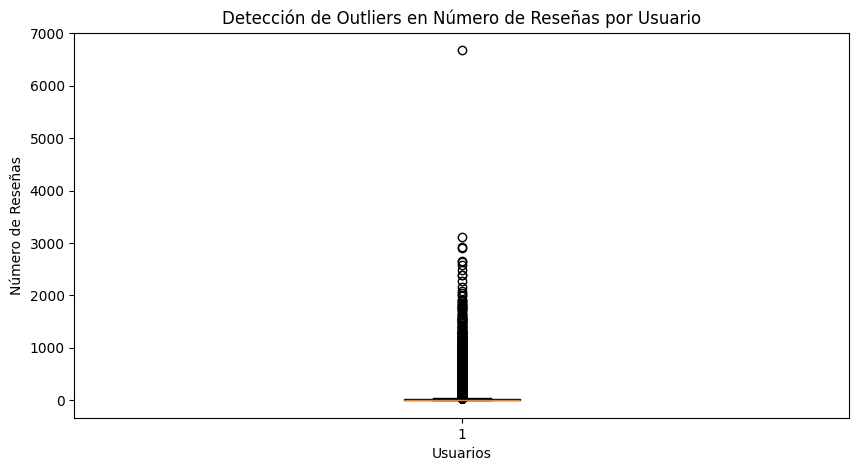

In [236]:
plt.figure(figsize=(10, 5))
plt.boxplot(users_df['review_count'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Usuarios')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas por Usuario')
plt.show()

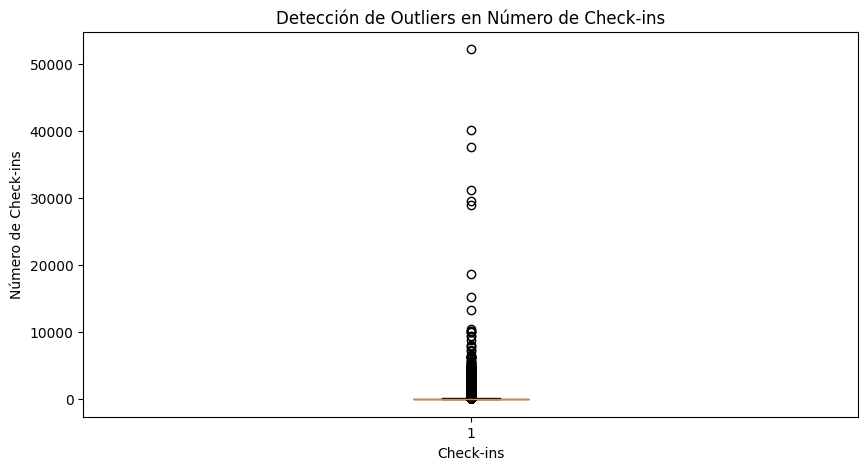

In [237]:
checkin_counts = checkin_df['date'].str.split(',').apply(len)

plt.figure(figsize=(10, 5))
plt.boxplot(checkin_counts.dropna(), patch_artist=True, boxprops=dict(facecolor='lightsalmon'))
plt.xlabel('Check-ins')
plt.ylabel('Número de Check-ins')
plt.title('Detección de Outliers en Número de Check-ins')
plt.show()


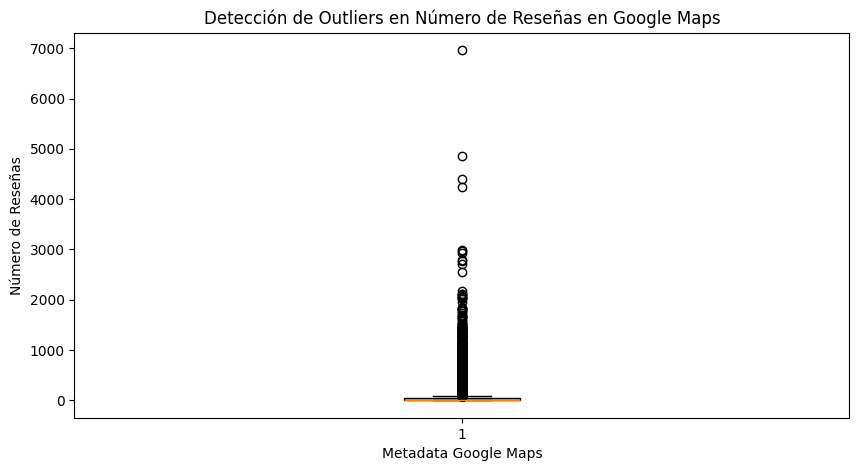

In [239]:
plt.figure(figsize=(10, 5))
plt.boxplot(metadata_df['num_of_reviews'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightcyan'))
plt.xlabel('Metadata Google Maps')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas en Google Maps')
plt.show()


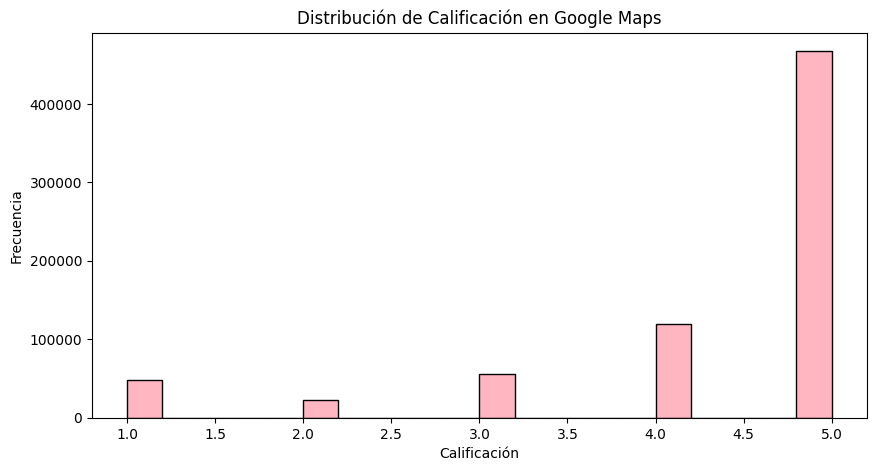

In [247]:
plt.figure(figsize=(10, 5))
plt.hist(review_google_df['rating'].dropna(), bins=20, edgecolor='black', color='lightpink')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificación en Google Maps')
plt.show()
